In [1]:
!pip install pandas requests


In [7]:
import requests
import time
import pandas as pd
from datetime import datetime, timedelta

cities = {
    'Florida': (25.7617, -80.1918),
    'California': (34.0522, -118.2437),
    'Texas': (29.7604, -95.3698),
    'New York': (40.7128, -74.0060),
    'Tennessee': (36.1627, -86.7816),
    'Carolinas': (35.7796, -78.6382)
}

base_url = "https://archive-api.open-meteo.com/v1/archive"

def fetch_city_weather(name, lat, lon, start_date, end_date):
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": "temperature_2m_max,temperature_2m_min,temperature_2m_mean",
        "timezone": "UTC"
    }
    print(f"Fetching data for {name} from {start_date} to {end_date}...")
    r = requests.get(base_url, params=params)
    if r.status_code != 200:
        print(f"Failed to fetch {name}: {r.status_code} - {r.text}")
        return None
    data = r.json().get("daily", {})

    df = pd.DataFrame({
        "date": data.get("time", []),
        "temp_max": data.get("temperature_2m_max", []),
        "temp_min": data.get("temperature_2m_min", []),
        "temp_mean": data.get("temperature_2m_mean", []),
    })
    df["city"] = name
    return df

start_date = datetime(2023, 9, 14)
end_date = datetime(2025, 12, 25)

start_date_str = start_date.strftime('%Y-%m-%d')
adjusted_end_date = min(end_date, datetime.now() - timedelta(days=1))
adjusted_end_date_str = adjusted_end_date.strftime('%Y-%m-%d')

all_data = []

for name, (lat, lon) in cities.items():
    df_city = fetch_city_weather(name, lat, lon, start_date_str, adjusted_end_date_str)
    if df_city is not None:
        all_data.append(df_city)
    time.sleep(1)

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    print("Done fetching all cities!")
    print(final_df.head())
    final_df.to_csv("all_cities_daily_weather.csv", index=False)
else:
    print("No data fetched for any city.")


Fetching data for Florida from 2023-09-14 to 2025-12-25...
Fetching data for California from 2023-09-14 to 2025-12-25...
Fetching data for Texas from 2023-09-14 to 2025-12-25...
Fetching data for New York from 2023-09-14 to 2025-12-25...
Fetching data for Tennessee from 2023-09-14 to 2025-12-25...
Fetching data for Carolinas from 2023-09-14 to 2025-12-25...
Done fetching all cities!
         date  temp_max  temp_min  temp_mean     city
0  2023-09-14      31.9      24.5       27.4  Florida
1  2023-09-15      31.8      24.0       27.3  Florida
2  2023-09-16      31.1      26.0       27.9  Florida
3  2023-09-17      31.3      25.8       28.1  Florida
4  2023-09-18      31.1      24.0       27.5  Florida


In [10]:
import pandas as pd

df_temp = pd.read_csv("all_cities_daily_weather.csv")
df_temp['date'] = pd.to_datetime(df_temp['date'])
df_temp.info()
df_temp.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5004 non-null   datetime64[ns]
 1   temp_max   5004 non-null   float64       
 2   temp_min   5004 non-null   float64       
 3   temp_mean  5004 non-null   float64       
 4   city       5004 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 195.6+ KB


,date,temp_max,temp_min,temp_mean
count,5004,5004.000000,5004.000000,5004.000000
mean,2024-11-03 12:00:00,23.382314,13.997022,18.114788
min,2023-09-14 00:00:00,-8.100000,-18.800000,-13.300000
25%,2024-04-09 00:00:00,18.500000,8.200000,12.900000
50%,2024-11-03 12:00:00,25.400000,15.200000,19.800000
75%,2025-05-31 00:00:00,29.500000,21.200000,24.625000
max,2025-12-25 00:00:00,45.700000,29.000000,34.300000
std,NaN,8.236487,8.501708,8.214363


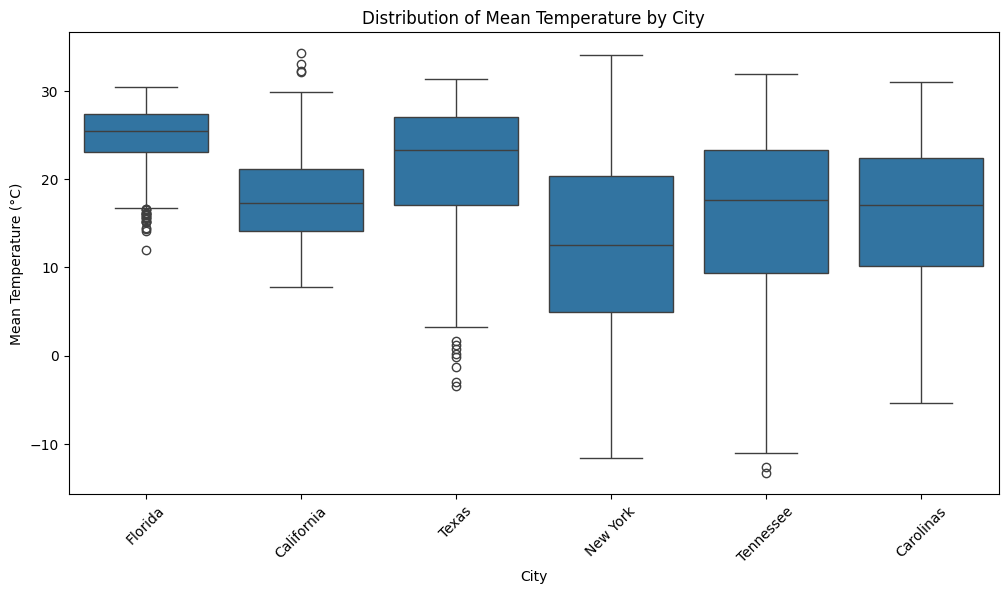

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='city', y='temp_mean', data=df_temp)
plt.title('Distribution of Mean Temperature by City')
plt.ylabel('Mean Temperature (°C)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2975984608.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_temp, x='month', y='temp_mean', hue='city', estimator='mean', ci=None)


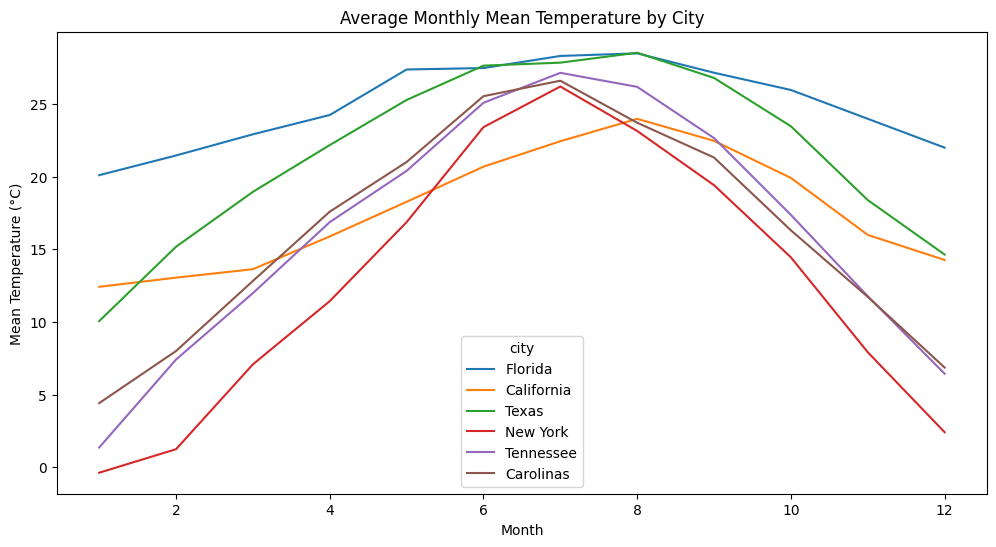

In [12]:
df_temp['month'] = df_temp['date'].dt.month

plt.figure(figsize=(12,6))
sns.lineplot(data=df_temp, x='month', y='temp_mean', hue='city', estimator='mean', ci=None)
plt.title('Average Monthly Mean Temperature by City')
plt.ylabel('Mean Temperature (°C)')
plt.xlabel('Month')
plt.show()
